In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
dataset=pd.read_csv("C:/heart.csv")

In [18]:
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
! pip install regression

In [21]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [22]:
dataset=pd.read_csv("C:/heart.csv")
x= dataset.iloc[:, [2,3]].values
y= dataset.iloc[:, 4].values

In [23]:
#splitting the dataset into the training set and test set of logistic regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [25]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [26]:
#predicting the test set results
y_pred=classifier.predict(x_test)
df=pd.DataFrame({'Actual':y_test,"Predict":y_pred})
print(df)

    Actual  Predict
0      174      177
1      227      283
2      288      283
3      258      177
4      231      234
..     ...      ...
71     235      234
72     240      197
73     289      228
74     225      228
75     175      211

[76 rows x 2 columns]


In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test)
print(cm)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

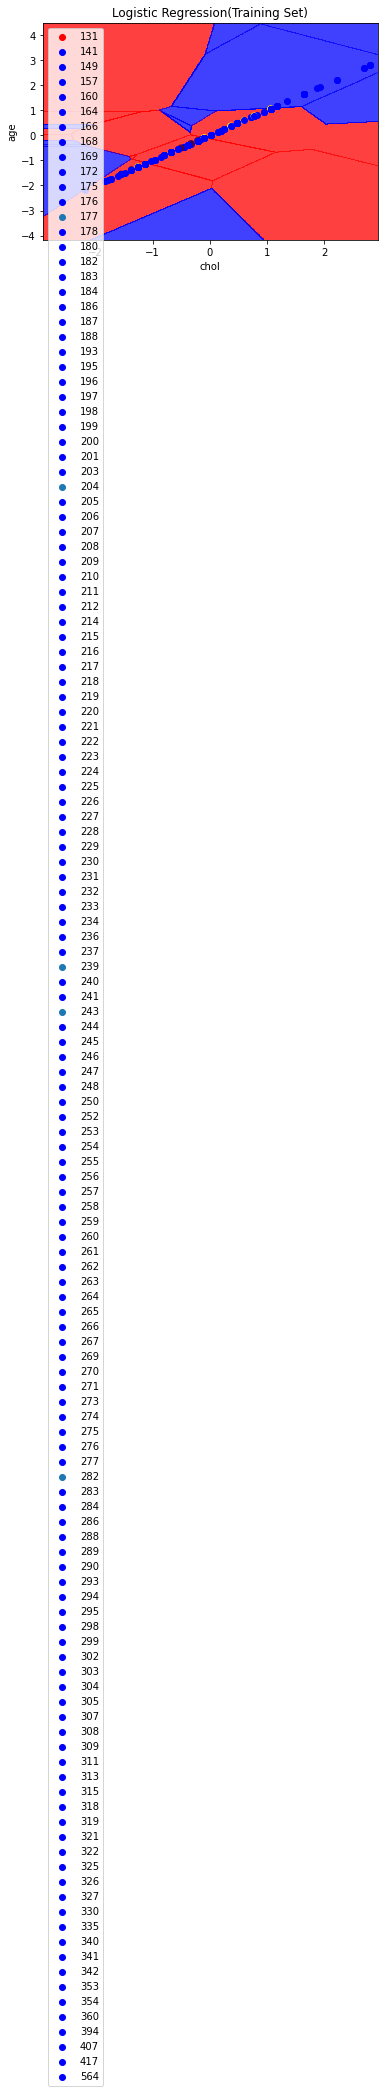

In [31]:
#visualising the training set results
from matplotlib.colors import ListedColormap
x_set, y_set= x_train, y_train
x1,x2= np.meshgrid(np.arange(start =x_set[:, 0].min() -2, stop=x_set[:, 0].max()+1, step = 0.01),
                   np.arange(start =x_set[:, 1].min() -2, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75,
            cmap = ListedColormap(('red','blue')))
plt.xlim((x1.min(),x1.max()))
plt.ylim((x2.min(),x2.max()))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,1], x_set[y_set==j,1], c= ListedColormap(('red','blue'))(i),label=j)
plt.title('Logistic Regression(Training Set)')
plt.xlabel('chol')
plt.ylabel('age')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

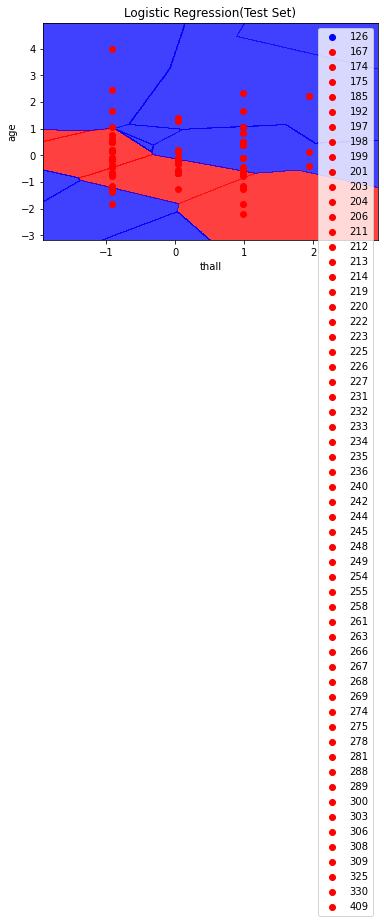

In [27]:
#visualising the test set results
from matplotlib.colors import ListedColormap
x_set, y_set= x_test, y_test
x1,x2= np.meshgrid(np.arange(start =x_set[:, 0].min() -1, stop=x_set[:, 0].max()+1, step = 0.01),
                   np.arange(start =x_set[:, 1].min() -1, stop=x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75,
            cmap = ListedColormap(('red','blue')))
plt.xlim((x1.min(),x1.max()))
plt.ylim((x2.min(),x2.max()))
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0], x_set[y_set==j,1], c= ListedColormap(('blue','red'))(i),label=j)
plt.title('Logistic Regression(Test Set)')
plt.xlabel('thall')
plt.ylabel('age')
plt.legend()
plt.show()

In [28]:
x = dataset.iloc[:, 1:3].values
print("\nOriginal data values : \n", x)


Original data values : 
 [[1 3]
 [1 2]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 2]
 [1 2]
 [1 0]
 [0 2]
 [1 1]
 [1 3]
 [0 3]
 [0 2]
 [0 2]
 [0 3]
 [1 0]
 [0 3]
 [1 0]
 [1 2]
 [1 0]
 [1 2]
 [1 3]
 [0 1]
 [1 2]
 [1 2]
 [0 2]
 [1 2]
 [0 1]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [0 2]
 [0 2]
 [1 2]
 [0 2]
 [0 2]
 [0 2]
 [1 1]
 [1 0]
 [0 0]
 [1 2]
 [1 1]
 [1 2]
 [1 2]
 [0 2]
 [0 0]
 [0 2]
 [1 0]
 [1 2]
 [0 2]
 [0 2]
 [1 1]
 [1 0]
 [1 0]
 [1 3]
 [0 0]
 [0 2]
 [1 1]
 [1 3]
 [1 1]
 [1 2]
 [0 0]
 [1 2]
 [0 1]
 [1 1]
 [0 0]
 [1 2]
 [1 2]
 [1 1]
 [1 0]
 [0 2]
 [0 1]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [0 2]
 [1 3]
 [0 0]
 [0 2]
 [1 2]
 [1 1]
 [0 2]
 [0 0]
 [1 2]
 [1 0]
 [1 2]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 2]
 [1 2]
 [1 3]
 [1 3]
 [0 1]
 [1 2]
 [1 2]
 [0 2]
 [1 3]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 2]
 [0 2]
 [1 0]
 [1 1]
 [0 2]
 [1 2]
 [1 3]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 2]
 [0 2]
 [0 2]
 [0 1]
 [1 0]
 [0 2]
 [0 2]
 [0 1]
 [0 2]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 2]
 [1 1]
 [1 0]
 

In [30]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(x)
print ("\nAfter Standardisation : \n", x_after_Standardisation)
                                                


After min max Scaling : 
 [[1.         1.        ]
 [1.         0.66666667]
 [0.         0.33333333]
 [1.         0.33333333]
 [0.         0.        ]
 [1.         0.        ]
 [0.         0.33333333]
 [1.         0.33333333]
 [1.         0.66666667]
 [1.         0.66666667]
 [1.         0.        ]
 [0.         0.66666667]
 [1.         0.33333333]
 [1.         1.        ]
 [0.         1.        ]
 [0.         0.66666667]
 [0.         0.66666667]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.66666667]
 [1.         0.        ]
 [1.         0.66666667]
 [1.         1.        ]
 [0.         0.33333333]
 [1.         0.66666667]
 [1.         0.66666667]
 [0.         0.66666667]
 [1.         0.66666667]
 [0.         0.33333333]
 [1.         0.        ]
 [1.         0.33333333]
 [1.         0.66666667]
 [1.         1.        ]
 [0.         0.66666667]
 [0.         0.66666667]
 [1.         0.66666667]
 [0.         0.66666667